Dice Score: 0.5639592409133911 at step 16960


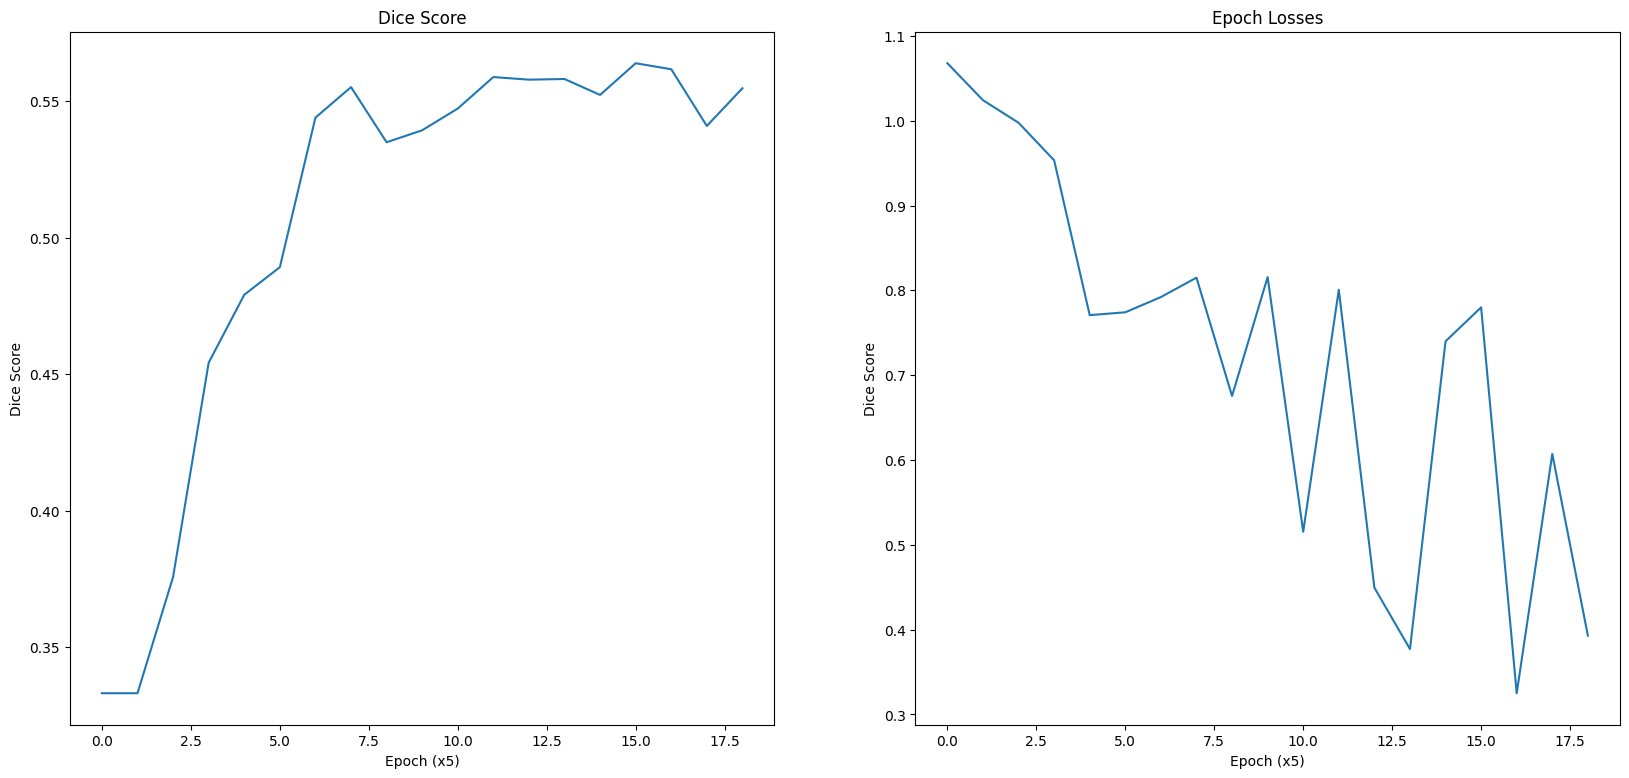

In [6]:
import json
import matplotlib.pyplot as plt
data = json.load(open('savefile.json', 'r'))
print(f"Dice Score: {data['dice_val_best']} at step {data['global_step_best']}")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))
axes[0].plot(data['metric_values'])
axes[0].set_title('Dice Score')
axes[0].set_xlabel('Epoch (x5)')
axes[0].set_ylabel('Dice Score')
# axes[0].
axes[1].plot(data['epoch_loss_values'])
axes[1].set_title('Epoch Losses')
axes[1].set_xlabel('Epoch (x5)')
_ = axes[1].set_ylabel('Dice Score')

In [2]:
from monai.networks.nets import UNETR
import torch
model = UNETR(
    in_channels=1,
    out_channels=3,
    img_size=(224, 224, 224),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    proj_type="conv",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
)
model.eval()
model.load_state_dict(torch.load("best_metric_model.pth", map_location='cpu'))

<All keys matched successfully>

In [3]:
from monai.transforms import LoadImage, Compose, SpatialPad, Resize
load = Compose([
    LoadImage(ensure_channel_first=True),
    SpatialPad(spatial_size=(512, 512, 256)),
    Resize(spatial_size=(224, 224, 224), mode="bilinear"),
])
input_vol = load('sample_data/input.nii.gz')
label_vol = load('sample_data/label.nii.gz').squeeze(0)
output = torch.argmax(torch.softmax(model(input_vol.unsqueeze(0)), dim=1), dim=1).squeeze(0)
input_vol = input_vol.squeeze(0)
print(output.shape)

torch.Size([224, 224, 224])


Text(0.5, 1.0, 'Model Prediction')

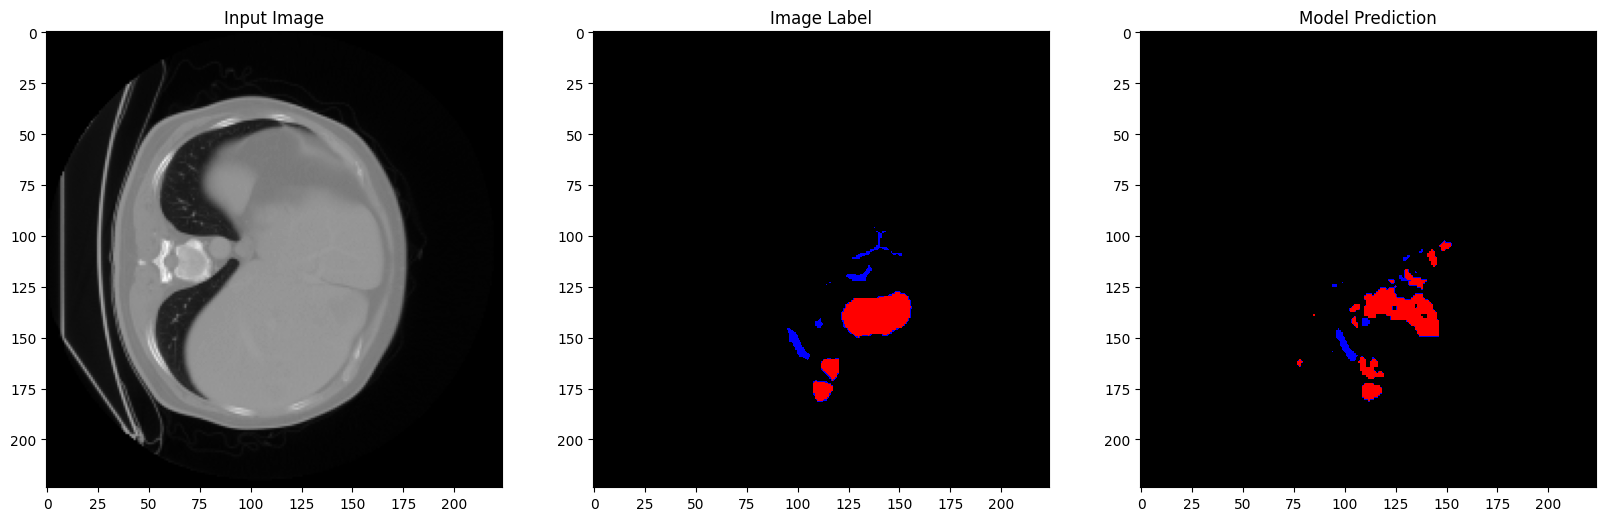

In [15]:
from matplotlib.colors import ListedColormap

slice = 120

colormap = ListedColormap(['black', 'blue', 'red'])
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
axes[0].imshow(input_vol[:, :, slice], cmap='gray')
axes[0].set_title('Input Image')
axes[1].imshow(label_vol[:, :, slice], cmap=colormap)
axes[1].set_title('Image Label')
axes[2].imshow(output[:, :, slice], cmap=colormap)
axes[2].set_title('Model Prediction')